In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TEAM : DAMS(Data Analysis Math Statistics)

### MISSION#1 : EDA

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
import cv2
import seaborn as sns
import random
import os
from scipy import stats
from keras.models import Sequential

#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function
from keras.layers import *
from keras.models import *
import os
import sys
import tarfile
import glob
from six.moves import urllib
from glob import glob
from tqdm import tqdm
import random
from scipy import stats
from sklearn.manifold import TSNE
import cv2

import shutil

import tensorflow as tf

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.models import load_model

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') 


In [3]:
# reproducibility
def set_seed(seed_num):
    tf.random.set_seed(seed_num)
    np.random.seed(seed_num)
    random.seed(seed_num)
    os.environ['PYTHONHASHSEED']=str(seed_num)

seed_num = 42
set_seed(seed_num)

In [4]:
img_dir = '/content/drive/MyDrive/data/'
categoris = os.listdir(img_dir)
nb_categoris = len(categoris)
print(nb_categoris)

20


In [5]:
categoris = os.listdir(img_dir)
image_total=0
count_list=[]

def folder_image_count(path):
    image_count = os.listdir(path)
    return len(image_count)

for i in range(nb_categoris):
    count=folder_image_count(img_dir+categoris[i])
    print("{0} : {1}개".format(categoris[i],count))
    image_total+=count
    count_list.append(count)
print("클래스의 개수는 {0}개 입니다".format(nb_categoris))
print("전체 데이터 개수는 {0}개 입니다.".format(image_total))

L2_10 : 1893개
L2_12 : 124개
L2_15 : 1509개
L2_20 : 410개
L2_21 : 410개
L2_24 : 422개
L2_25 : 6189개
L2_27 : 426개
L2_3 : 200개
L2_30 : 364개
L2_33 : 6206개
L2_34 : 419개
L2_39 : 454개
L2_40 : 180개
L2_41 : 200개
L2_44 : 547개
L2_45 : 631개
L2_46 : 2214개
L2_50 : 402개
L2_52 : 382개
클래스의 개수는 20개 입니다
전체 데이터 개수는 23582개 입니다.


In [6]:
import math
percent_list=[]
for i in range(nb_categoris):
    percent=count_list[i] / image_total * 100
    percent=round(percent,3)
    percent_list.append(percent)
dataframe=pd.DataFrame({"Category":categoris, "Count": count_list, 
                        "Percent": percent_list} )
dataframe.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Category,L2_10,L2_12,L2_15,L2_20,L2_21,L2_24,L2_25,L2_27,L2_3,L2_30,L2_33,L2_34,L2_39,L2_40,L2_41,L2_44,L2_45,L2_46,L2_50,L2_52
Count,1893,124,1509,410,410,422,6189,426,200,364,6206,419,454,180,200,547,631,2214,402,382
Percent,8.027,0.526,6.399,1.739,1.739,1.79,26.245,1.806,0.848,1.544,26.317,1.777,1.925,0.763,0.848,2.32,2.676,9.389,1.705,1.62


In [7]:
dataframe.describe()

,Count,Percent
count,20.000000,20.000000
mean,1179.100000,5.000150
std,1808.132998,7.667501
min,124.000000,0.526000
25%,377.500000,1.601000
50%,420.500000,1.783500
75%,850.500000,3.606750
max,6206.000000,26.317000


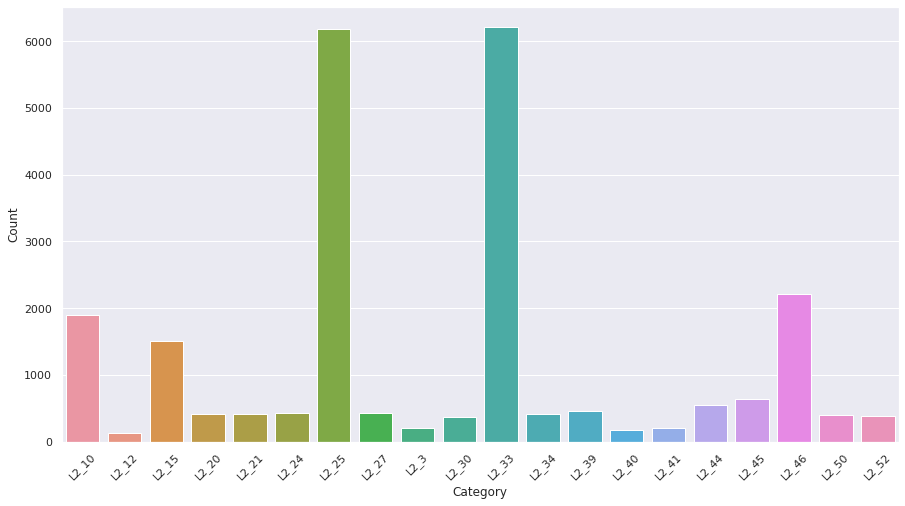

In [8]:
sns.set(rc={'figure.figsize':(15,8)})
fig = sns.barplot(x='Category',y='Count',data=dataframe)
plt.xticks(rotation=45)
plt.show()

이미지의 특징을 csv 파일로 만들어서 편하게 분석하고자 함. 아래의 코드를 이용하여 csv 파일 생성

In [9]:
# import glob
# #print(nb_categoris)
# img_name_list=[] # 파일명 리스트
# channel_list=[]  # 영상 채널 리스트
# ext_list=[] # 확장자 리스트
# width_list=[] # 영상 데이터 가로 길이
# height_list=[] # 영상 데이터 세로 길이
# cat_list=[] # 클래스
# path_list=[] # 이미지 경로
# for i in range(nb_categoris):
#   a=glob.glob(img_dir+categoris[i]+'/*')
#   for j in range(len(a)):
#     cat_img_name= a[j].split('/')[-1:]
#     temp=cat_img_name[0].split('\\')
#     #print(temp)
#     #print(cat_img_name)
#     img_name=temp[-1]
#     #print(img_name)
#     cat=temp[0]
#     #print(cat)
#     ext=img_name.split('.')[-1]
#     #print(cat)
#     #print(img_name)
#     #print(ext)
#     img = cv2.imread(a[j], cv2.IMREAD_UNCHANGED) #cv2.IMREAD_UNCHANGED 해당 옵션이 있어야 채널값이 4인 데이터 분별 가능 
#     if img.ndim ==2: # 흑백 이미지의 경우 채널값이 없는 2차원 배열이므로 조건문처리
#       w, h = img.shape
#       c=1
#     else:
#       w, h, c = img.shape
#     cat_list.append(cat)
#     img_name_list.append(img_name)
#     ext_list.append(ext)
#     width_list.append(w)
#     height_list.append(h)
#     channel_list.append(c)
#     path_list.append(a[j])

# img_info=pd.DataFrame({"IMG_ID":img_name_list,
#                        "Category": cat_list,
#                       "Extension": ext_list,
#                       "Width": width_list,
#                       "Height": height_list,
#                       "Channel": channel_list,
#                        "Path": path_list} )
# img_info
#img_info.to_csv('./img_info.csv',index=False)

In [10]:
img_info=pd.read_csv("/content/drive/MyDrive/img_info.csv")
img_info.head(3)

,IMG_ID,Category,Extension,Width,Height,Channel,Path
0,bmctcsqlzotwfhmvrnjo.jpg,L2_10,jpg,300,300,3,./drive/MyDrive/data/L2_10/bmctcsqlzotwfhmvrnj...
1,btuixnvjxcztpmutlehv.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/btuixnvjxcztpmutleh...
2,edkxyljaevluzpccthfb.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/edkxyljaevluzpccthf...


In [11]:
img_info['img']=img_info.IMG_ID.str.split('.').str[0]
img_info.head()

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
0,bmctcsqlzotwfhmvrnjo.jpg,L2_10,jpg,300,300,3,./drive/MyDrive/data/L2_10/bmctcsqlzotwfhmvrnj...,bmctcsqlzotwfhmvrnjo
1,btuixnvjxcztpmutlehv.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/btuixnvjxcztpmutleh...,btuixnvjxcztpmutlehv
2,edkxyljaevluzpccthfb.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/edkxyljaevluzpccthf...,edkxyljaevluzpccthfb
3,iggmyrvxuuodahwxdpcs.jpg,L2_10,jpg,300,300,3,./drive/MyDrive/data/L2_10/iggmyrvxuuodahwxdpc...,iggmyrvxuuodahwxdpcs
4,mnplauecvcurkywnpqfa.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/mnplauecvcurkywnpqf...,mnplauecvcurkywnpqfa


In [12]:
img_info.drop_duplicates(['img'],inplace=True)
img_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25503 entries, 0 to 25502
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMG_ID     25503 non-null  object
 1   Category   25503 non-null  object
 2   Extension  25503 non-null  object
 3   Width      25503 non-null  int64 
 4   Height     25503 non-null  int64 
 5   Channel    25503 non-null  int64 
 6   Path       25503 non-null  object
 7   img        25503 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.8+ MB


In [13]:
#결측값
img_info.isnull().sum()

IMG_ID       0
Category     0
Extension    0
Width        0
Height       0
Channel      0
Path         0
img          0
dtype: int64

In [14]:
# 클래스 별 데이터 개수 및 평균
print(img_info.groupby("Category")["IMG_ID"].count())
print('\n')
print(img_info.groupby("Category")["IMG_ID"].count().mean())

Category
L2_10    1893
L2_12     518
L2_15    1509
L2_20     410
L2_21     410
L2_24     782
L2_25    6189
L2_27     426
L2_3      595
L2_30     364
L2_33    6206
L2_34     419
L2_39     454
L2_40     180
L2_41     593
L2_44     547
L2_45     631
L2_46    2214
L2_50     781
L2_52     382
Name: IMG_ID, dtype: int64


1275.15


In [15]:
img_info[img_info.Channel==1]

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
4965,tymqqdoygnolomnkjkph.jpg,L2_24,jpg,3508,2480,1,./drive/MyDrive/data/L2_24/tymqqdoygnolomnkjkp...,tymqqdoygnolomnkjkph
12925,ztkcyprbncgkluufgxxh.jpg,L2_30,jpg,3508,2480,1,./drive/MyDrive/data/L2_30/ztkcyprbncgkluufgxx...,ztkcyprbncgkluufgxxh
12951,sejkpoipoqtssdispyqq.jpg,L2_30,jpg,3508,2480,1,./drive/MyDrive/data/L2_30/sejkpoipoqtssdispyq...,sejkpoipoqtssdispyqq
21510,qowbaduogreoqlqgkzsc.jpg,L2_45,jpg,3508,2480,1,./drive/MyDrive/data/L2_45/qowbaduogreoqlqgkzs...,qowbaduogreoqlqgkzsc
21596,oitkkvuasrrheybiwgfw.jpg,L2_45,jpg,2480,3508,1,./drive/MyDrive/data/L2_45/oitkkvuasrrheybiwgf...,oitkkvuasrrheybiwgfw
21597,yudjtlslwipvblwncold.jpg,L2_45,jpg,3508,2480,1,./drive/MyDrive/data/L2_45/yudjtlslwipvblwncol...,yudjtlslwipvblwncold


In [16]:
img_info[img_info.Channel==4]

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
1003,lqemgjlhgrhxvcjaaosl.png,L2_10,png,300,300,4,./drive/MyDrive/data/L2_10/lqemgjlhgrhxvcjaaos...,lqemgjlhgrhxvcjaaosl
1006,kktuzbhlvgnwferqiiex.png,L2_10,png,300,300,4,./drive/MyDrive/data/L2_10/kktuzbhlvgnwferqiie...,kktuzbhlvgnwferqiiex
1009,ehlcplifvjivgrvpdscq.png,L2_10,png,700,700,4,./drive/MyDrive/data/L2_10/ehlcplifvjivgrvpdsc...,ehlcplifvjivgrvpdscq
1015,qzidvnlijkajswudeibk.png,L2_10,png,700,700,4,./drive/MyDrive/data/L2_10/qzidvnlijkajswudeib...,qzidvnlijkajswudeibk
1022,zagdtzxkiofygvapxlnk.png,L2_10,png,700,700,4,./drive/MyDrive/data/L2_10/zagdtzxkiofygvapxln...,zagdtzxkiofygvapxlnk
...,...,...,...,...,...,...,...,...
25492,kgylmsktwdpvjipuxcjy.png,L2_52,png,300,300,4,./drive/MyDrive/data/L2_52/kgylmsktwdpvjipuxcj...,kgylmsktwdpvjipuxcjy
25495,dpngxxqgngecscrgtrdl.png,L2_52,png,700,700,4,./drive/MyDrive/data/L2_52/dpngxxqgngecscrgtrd...,dpngxxqgngecscrgtrdl
25498,xazvpjwaydqrbvpjbvul.png,L2_52,png,700,700,4,./drive/MyDrive/data/L2_52/xazvpjwaydqrbvpjbvu...,xazvpjwaydqrbvpjbvul
25499,dtxfpcggpnrgqolnmdoy.png,L2_52,png,700,700,4,./drive/MyDrive/data/L2_52/dtxfpcggpnrgqolnmdo...,dtxfpcggpnrgqolnmdoy


img의 정보가 담긴 img_info.csv 파일에서 Channel을 파악해보니 3차원의 이미지 뿐 아니라 1차원과 4차원의 이미지가 있는 것을 확인하였다.

In [17]:
# 클래스 수
#print(img_info.Category.unique())
print("클래스 => {0}개".format(len(img_info.Category.unique())))
print("*"*30)
# 채널 개수
print("1 Channel : {0} 개".format(img_info.IMG_ID[img_info.Channel==1].count()))
print("3 Channel : {0} 개".format(img_info.IMG_ID[img_info.Channel==3].count()))
print("4 Channel : {0} 개".format(img_info.IMG_ID[img_info.Channel==4].count()))
print("*"*30)
# 확장자
print("파일 확장자 => {0}".format(img_info.Extension.unique()))
print("JPG FIle : {0} 개".format(img_info.IMG_ID[img_info.Extension=='jpg'].count()))
print("PNG FIle : {0} 개".format(img_info.IMG_ID[img_info.Extension=='png'].count()))
print("*"*30)
# 영상데이터 크기
print("이미지 크기 Min,Max")
print("Max Width : {0}".format(img_info.Width.max()))
print("Min Width : {0}".format(img_info.Width.min()))
print("Max Height : {0}".format(img_info.Height.max()))
print("Min Height : {0}".format(img_info.Height.min()))

클래스 => 20개
******************************
1 Channel : 6 개
3 Channel : 24360 개
4 Channel : 1137 개
******************************
파일 확장자 => ['jpg' 'png']
JPG FIle : 23992 개
PNG FIle : 1511 개
******************************
이미지 크기 Min,Max
Max Width : 5000
Min Width : 97
Max Height : 5001
Min Height : 162


이미지의 분포 확인

In [18]:
# 8 samples in L2_3 class
sample_class = 'L2_3'
bad_samples_list = ['abrqcpmsuamnssulgkpj.jpg', 'abztjcnppwlfowvgvxzh.jpg', 'adkycmnzaohvajzhmjmc.jpg', 'aekgeinetflnsrfjzdnz.jpg' ]
good_samples_list = ['afpshvgquwihqffkfwzv.jpg', 'arbwlanxwhkgysnysfgx.jpg', 'ajxtvvmhazktviuvkitg.jpg', 'aurmiefqnyebresyjnlu.jpg']
all_sample_list = bad_samples_list + good_samples_list

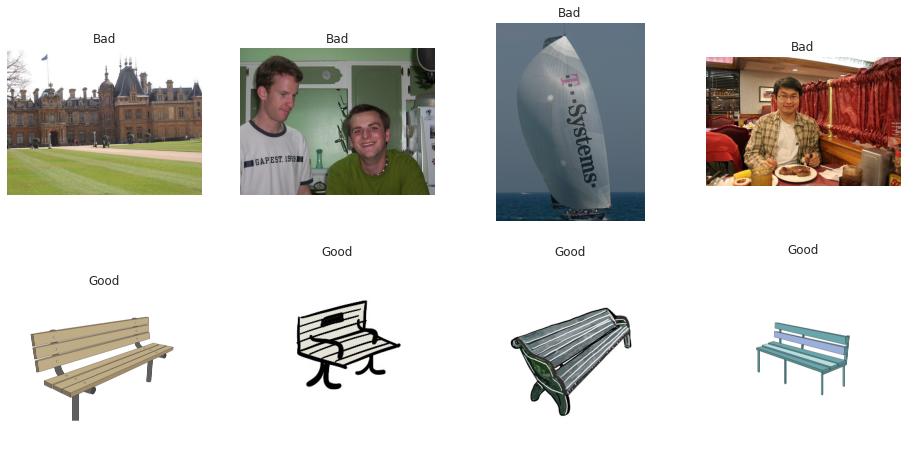

In [19]:
counter = 0
fig = plt.figure(figsize=(16, 8))
for n in range(2):
    for m in range(4):

        images = tf.keras.preprocessing.image.load_img(img_dir+sample_class+'/'+all_sample_list[counter])
        ax = fig.add_subplot(2, 4, 4*n+m+1)
        plt.imshow(images)

        plt.axis('off')
        
        if n==0:
            plt.title("Bad")
        else:
            plt.title("Good")  

        counter += 1

In [20]:
class_colors = {1: "Red", 2: "Orange", 3: "Gold", 4: "Limegreen",
                5: "Mediumseagreen", 6: "Darkturquoise", 7: "Steelblue", 8: "Purple"}

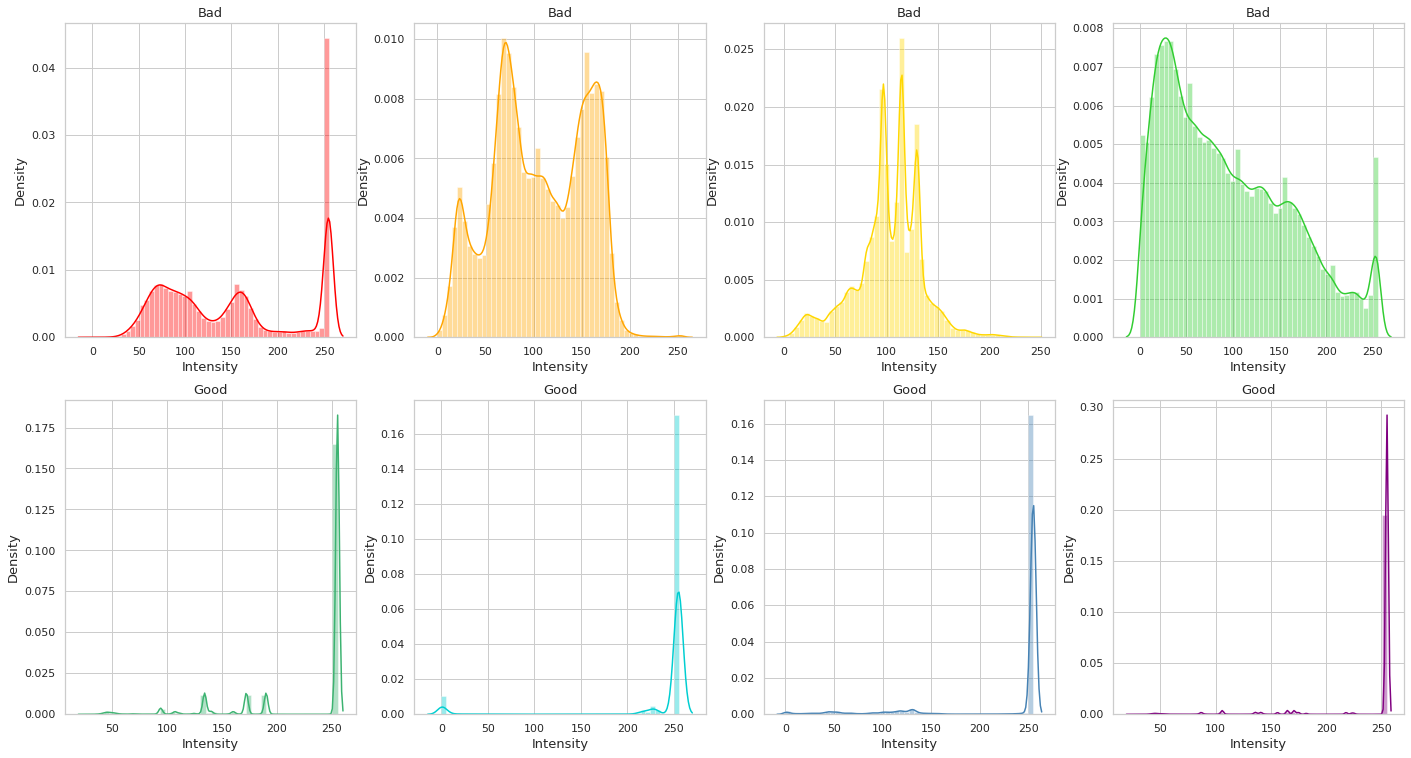

In [21]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24, 12))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

counter=0
for n in range(2):
    for m in range(4):
        images = tf.keras.preprocessing.image.load_img(img_dir+sample_class+'/'+all_sample_list[counter])
        ax = fig.add_subplot(2, 4, 4*n+m+1)

        sns.distplot(np.array(images).flatten(),
                     color = class_colors[counter+1])
        
        plt.xlabel("Intensity", fontsize = 13)
        plt.ylabel("Density", fontsize = 13)
        if n==0:
            plt.title("Bad", fontsize = 13)
        else:
            plt.title("Good", fontsize = 13) 

        counter +=1

In [22]:
# bad
for i in range(len(bad_samples_list)):
    images = tf.keras.preprocessing.image.load_img(img_dir+sample_class+'/'+bad_samples_list[i])
    intensities = np.array(images).flatten()
    print(stats.mode(intensities))

ModeResult(mode=array([255], dtype=uint8), count=array([110108]))
ModeResult(mode=array([71], dtype=uint8), count=array([5930]))
ModeResult(mode=array([115], dtype=uint8), count=array([19665]))
ModeResult(mode=array([255], dtype=uint8), count=array([5419]))


In [23]:
# good
for i in range(len(good_samples_list)):
    images = tf.keras.preprocessing.image.load_img(img_dir+sample_class+'/'+good_samples_list[i])
    intensities = np.array(images).flatten()
    print(stats.mode(intensities))

ModeResult(mode=array([255], dtype=uint8), count=array([19787007]))
ModeResult(mode=array([255], dtype=uint8), count=array([231704]))
ModeResult(mode=array([255], dtype=uint8), count=array([3575117]))
ModeResult(mode=array([255], dtype=uint8), count=array([23488274]))


In [24]:
def get_all_quantile(data):
    class_intensities = np.array(data).flatten()
    class_stats = np.zeros(10)
    class_stats[0] = stats.mode(class_intensities)[0][0]
    for q in range(1, 10):
        class_stats[q] = np.quantile(class_intensities, (q * 10)/100)
    return class_stats

In [25]:
stats_quantities = ["Mode","Q10", "Q20", "Q30", "Q40", "Median", "Q60", "Q70", "Q80", "Q90"]
overall_statistics = pd.DataFrame(index = np.arange(1,9), columns=stats_quantities)

for idx in range(1,9):
    images = tf.keras.preprocessing.image.load_img(img_dir+sample_class+'/' + all_sample_list[idx-1])
    overall_statistics.loc[idx,:] = get_all_quantile(images)

In [26]:
overall_statistics.index.name = None
overall_statistics
overall_statistics.fillna(value=np.nan, inplace=True)

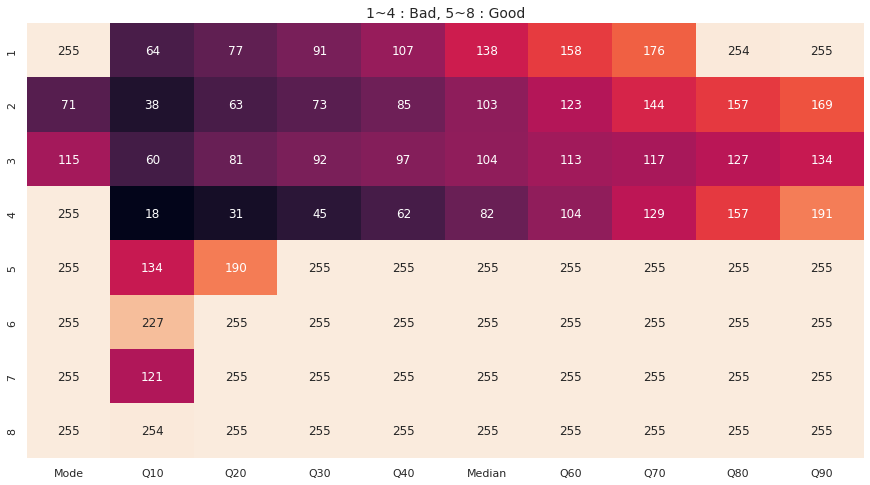

In [27]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(overall_statistics, annot=True, cbar=False, fmt="g")
plt.title("1~4 : Bad, 5~8 : Good", fontsize = 14)
plt.show()

In [28]:
import warnings
warnings.filterwarnings('ignore')

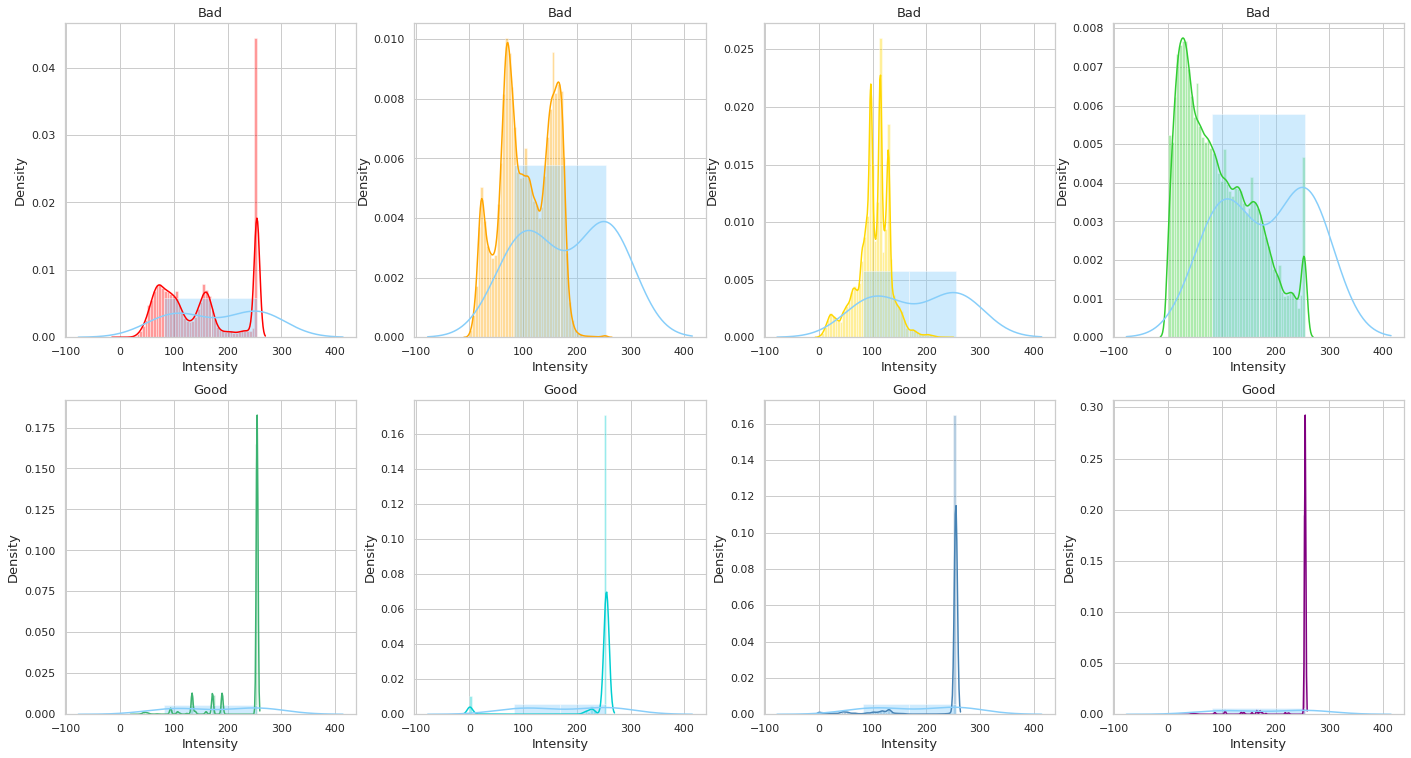

In [29]:
my_feature = "Median"
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24, 12))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

counter=0
for n in range(2):
    for m in range(4):
        images = tf.keras.preprocessing.image.load_img(img_dir+sample_class+'/'+all_sample_list[counter])
        ax = fig.add_subplot(2, 4, 4*n+m+1)

        sns.distplot(np.array(images).flatten(),
                     color = class_colors[counter+1])
        sns.distplot(overall_statistics[my_feature],
                     color = "lightskyblue")
        
        plt.xlabel("Intensity", fontsize = 13)
        plt.ylabel("Density", fontsize = 13)
        if n==0:
            plt.title("Bad", fontsize = 13)
        else:
            plt.title("Good", fontsize = 13) 

        counter +=1

일러스트와 실사의 분포가 다름을 확인<br>
따라서 일러스트만 있는 폴더와 일러스트와 실사가 섞인 폴더의 특징이 다를거라도 추정<br>
확인 해봄..

In [30]:
def get_all_quantile(data):
    class_intensities = np.array(data).flatten()
    class_stats = np.zeros(10)
    class_stats[0] = stats.mode(class_intensities)[0][0]
    
    for q in range(1, 10):
        class_stats[q] = np.quantile(class_intensities, (q * 10)/100)
    return class_stats

In [31]:
# def load_data_files(base_dir):
#     all_counts = []
#     all_classes = []
#     folder_name = img_dir
#     RAW_DATASET = os.path.join(base_dir, folder_name)

#     abs_dir = os.path.join(os.getcwd(), folder_name)
#     sub_dir = os.listdir(abs_dir)
#     data_dic = {}
    
#     for class_name  in sub_dir:
#         imgs = glob(os.path.join(RAW_DATASET,class_name,"*.jpg"))

#         data_dic[class_name] = imgs
#         print("Class: {}".format(class_name))
#         print("Number of images: {} \n".format(len(imgs)))
#         all_classes.append(class_name)
#         all_counts.append(len(imgs))
#     return data_dic, all_counts, all_classes


# data_dic, all_counts, all_classes = load_data_files(img_dir)

In [32]:
# import pandas as pd

# all_statistics = pd.DataFrame(index = np.arange(np.sum(all_counts)), columns = stats_quantities + ['label', 'img'])
# idx = 0
# for class_name, imgs in data_dic.items():    
#     for i in range(len(imgs)):
#         images = tf.keras.preprocessing.image.load_img(imgs[i])
#         all_statistics.loc[idx,:10] = get_all_quantile(images)
#         all_statistics['label'].loc[idx] = class_name
#         all_statistics['img'].loc[idx] = imgs[i]
#         idx +=1

이를 통해 만들어진 all_statistics.csv 파일을 이용

In [33]:
#all_statistics.to_csv('all_statistics.csv', index = False)
all_statistics = pd.read_csv('/content/drive/MyDrive/all_statistics.csv')
all_statistics.head()

,Mode,Q10,Q20,Q30,Q40,Median,Q60,Q70,Q80,Q90,label,img
0,255.0,11.0,90.0,230.0,255.0,255.0,255.0,255.0,255.0,255.0,L2_10,/content/drive/MyDrive/data_creator/dataset/L2...
1,255.0,54.0,54.0,106.0,255.0,255.0,255.0,255.0,255.0,255.0,L2_10,/content/drive/MyDrive/data_creator/dataset/L2...
2,255.0,7.0,69.0,110.0,254.0,255.0,255.0,255.0,255.0,255.0,L2_10,/content/drive/MyDrive/data_creator/dataset/L2...
3,255.0,31.0,52.0,118.0,142.0,164.0,253.0,255.0,255.0,255.0,L2_10,/content/drive/MyDrive/data_creator/dataset/L2...
4,255.0,65.0,181.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,L2_10,/content/drive/MyDrive/data_creator/dataset/L2...


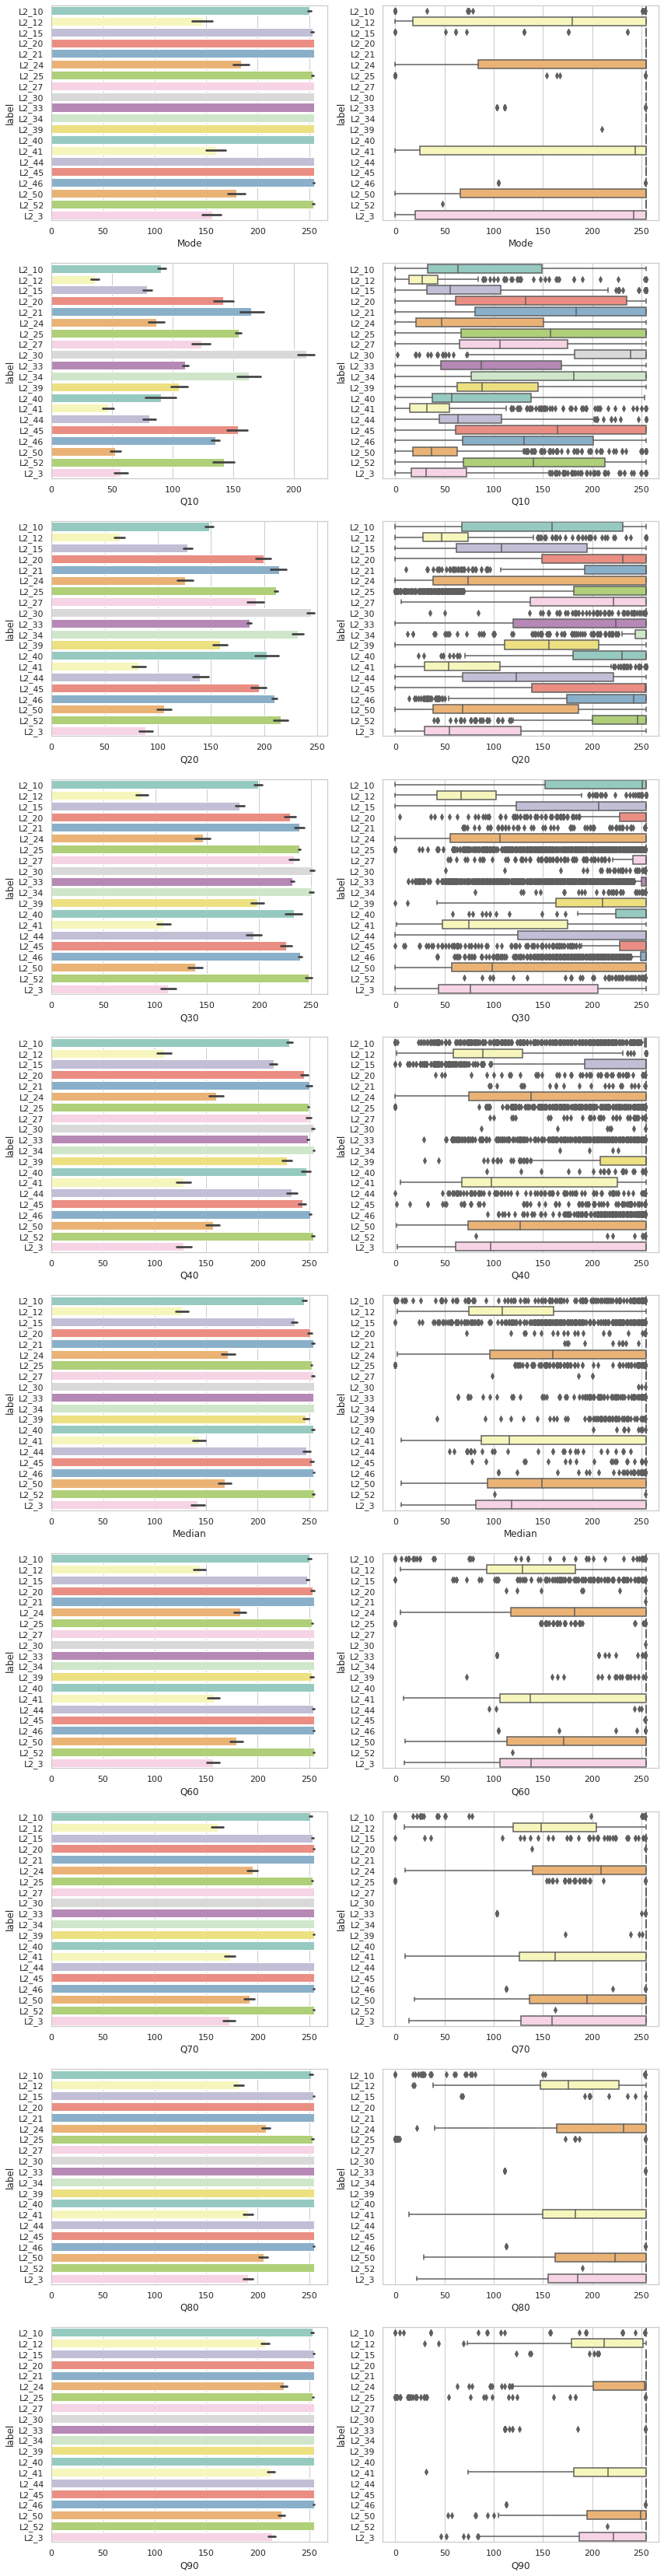

In [34]:
import seaborn as sns
fig = plt.figure(figsize=(14,60))
colors = sns.color_palette('Set3')
a=10   # rows
b=2    # column
c=1    # counter

data = all_statistics.copy()  
for features in stats_quantities:
    colors = sns.color_palette('Set3')
    plt.subplot(a,b,c)
    sns.barplot(x=features, y="label", data=data, palette="Set3")
    c = c + 1 
    plt.subplot(a,b,c)
    sns.boxplot(x=features, y="label", data=data, palette="Set3")
    c = c + 1 
plt.savefig("pretty_barplot.jpg")
plt.show()

5개의 폴더에 실사가 포함되어 있어 평균이 다른 것을 확인<br>
따라서 5개의 폴더에 대하여 실사와 일러스트를 구분하는 알고리즘을 적용


### MISSION 2 : 실사, 일러스트 구분 후 실사 제거

#### Self-Supervised Learning with SimSLR
- SimSLR implementation
- Referred from: https://arxiv.org/pdf/2002.05709.pdf (Appendix A) 
- corresponding GitHub: https://github.com/google-research/simclr/)

In [35]:
img_info2=pd.read_csv("./drive/MyDrive/img_info.csv")

In [36]:
img_info2.head()

,IMG_ID,Category,Extension,Width,Height,Channel,Path
0,bmctcsqlzotwfhmvrnjo.jpg,L2_10,jpg,300,300,3,./drive/MyDrive/data/L2_10/bmctcsqlzotwfhmvrnj...
1,btuixnvjxcztpmutlehv.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/btuixnvjxcztpmutleh...
2,edkxyljaevluzpccthfb.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/edkxyljaevluzpccthf...
3,iggmyrvxuuodahwxdpcs.jpg,L2_10,jpg,300,300,3,./drive/MyDrive/data/L2_10/iggmyrvxuuodahwxdpc...
4,mnplauecvcurkywnpqfa.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/mnplauecvcurkywnpqf...


In [37]:
img_info2['Path'] = img_info2['Path'].str[16:]
photo_illust_mix = img_info2.loc[(img_info2['Category']=='L2_3')|(img_info2['Category']=='L2_12')|
             (img_info2['Category']=='L2_24')|(img_info2['Category']=='L2_41')
            |(img_info2['Category']=='L2_50')]
print(photo_illust_mix['Channel'].unique())

[3 4 1]


In [38]:
photo_illust_mix.drop(photo_illust_mix[photo_illust_mix['Channel'] == 1].index , inplace=True)
print(photo_illust_mix['Channel'].unique())
print("The number of training images :", len(photo_illust_mix))

[3 4]
The number of training images : 3268


In [39]:
seed_num=42
shuffle_train = photo_illust_mix.sample(frac=1, random_state = seed_num)

In [40]:
#del shuffle_train['Unnamed: 0']
shuffle_train

,IMG_ID,Category,Extension,Width,Height,Channel,Path
24936,ybjxburheqngcghkrchk.jpg,L2_50,jpg,375,500,3,data/L2_50/ybjxburheqngcghkrchk.jpg
2027,xgvpwsbnwhstuaoeqqzx.jpg,L2_12,jpg,375,500,3,data/L2_12/xgvpwsbnwhstuaoeqqzx.jpg
2304,vwcsxxbpnnbjmlylkfzz.jpg,L2_12,jpg,333,500,3,data/L2_12/vwcsxxbpnnbjmlylkfzz.jpg
2096,hrcqfimfujdqyzzbvhjg.jpg,L2_12,jpg,333,500,3,data/L2_12/hrcqfimfujdqyzzbvhjg.jpg
24790,swxrltqucsyjftlkfyic.jpg,L2_50,jpg,375,500,3,data/L2_50/swxrltqucsyjftlkfyic.jpg
...,...,...,...,...,...,...,...
5318,zgpgvpobvjjezkipzjnr.jpg,L2_24,jpg,375,500,3,data/L2_24/zgpgvpobvjjezkipzjnr.jpg
5353,aemwrbvwjwncaipqzdrz.jpg,L2_24,jpg,375,500,3,data/L2_24/aemwrbvwjwncaipqzdrz.jpg
5517,ittnpolmizmcjxdkgapn.jpg,L2_24,jpg,375,500,3,data/L2_24/ittnpolmizmcjxdkgapn.jpg
5083,lznvspzbinwygmbcrvgg.jpg,L2_24,jpg,3508,2480,3,data/L2_24/lznvspzbinwygmbcrvgg.jpg


In [41]:
train_df = shuffle_train.copy()
train_images = list(train_df['Path'])
print(len(train_images))

3268


In [42]:
class CustomAugment(object):
    def __call__(self, sample):        
        sample = self._random_apply(tf.image.flip_left_right, sample, p=0.5)
        sample = self._random_apply(self._color_jitter, sample, p=0.8)
        return sample

    def _color_jitter(self, x, s=1):
        x = tf.image.random_brightness(x, max_delta=0.8*s)
        x = tf.image.random_contrast(x, lower=1-0.8*s, upper=1+0.8*s)
        x = tf.image.random_saturation(x, lower=1-0.8*s, upper=1+0.8*s)
        x = tf.image.random_hue(x, max_delta=0.2*s)
        x = tf.clip_by_value(x, 0, 1)
        return x
    
    def _color_drop(self, x):
        x = tf.image.rgb_to_grayscale(x)
        x = tf.tile(x, [1, 1, 1, 3])
        return x
    
    def _random_apply(self, func, x, p):
        return tf.cond(
          tf.less(tf.random.uniform([], minval=0, maxval=1, dtype=tf.float32),
                  tf.cast(p, tf.float32)),
          lambda: func(x),
          lambda: x)

In [43]:
data_augmentation = Sequential([Lambda(CustomAugment())])

In [44]:
@tf.function
def parse_images(image_path):
    image_string = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[224, 224])

    return image

In [45]:
BATCH_SIZE = 64

train_ds = tf.data.Dataset.from_tensor_slices(train_images)
train_ds = (
    train_ds
    .map(parse_images, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .shuffle(1024)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

In [46]:
def get_resnet_simclr(hidden_1, hidden_2, hidden_3):
    base_model = tf.keras.applications.ResNet50(include_top=False, weights=None, input_shape=(224, 224, 3))
    base_model.trainable = True
    inputs = Input((224, 224, 3))
    h = base_model(inputs, training=False)
    h = GlobalAveragePooling2D()(h)

    projection_1 = Dense(hidden_1)(h)
    projection_1 = Activation("relu")(projection_1)
    projection_2 = Dense(hidden_2)(projection_1)
    projection_2 = Activation("relu")(projection_2)
    projection_3 = Dense(hidden_3)(projection_2)

    resnet_simclr = Model(inputs, projection_3)

    return resnet_simclr

In [47]:
def _cosine_simililarity_dim1(x, y):
    cosine_sim_1d = tf.keras.losses.CosineSimilarity(axis=1, reduction=tf.keras.losses.Reduction.NONE)
    v = cosine_sim_1d(x, y)
    return v

def _cosine_simililarity_dim2(x, y):
    cosine_sim_2d = tf.keras.losses.CosineSimilarity(axis=2, reduction=tf.keras.losses.Reduction.NONE)
    v = cosine_sim_2d(tf.expand_dims(x, 1), tf.expand_dims(y, 0))
    return v

def sim_func_dim1(x, y):
    v = tf.matmul(tf.expand_dims(x, 1), tf.expand_dims(y, 2))
    return v

def sim_func_dim2(x, y):
    v = tf.tensordot(tf.expand_dims(x, 1), tf.expand_dims(tf.transpose(y), 0), axes=2)
    return v

In [48]:
class GaussianBlur(object):
    def __init__(self, kernel_size, min=0.1, max=2.0):
        self.min = min
        self.max = max
        self.kernel_size = kernel_size

    def __call__(self, sample):
        sample = np.array(sample)

        prob = np.random.random_sample()

        if prob < 0.5:
            sigma = (self.max - self.min) * np.random.random_sample() + self.min
            sample = cv2.GaussianBlur(sample, (self.kernel_size, self.kernel_size), sigma)

        return sample

In [49]:
def get_negative_mask(batch_size):
    negative_mask = np.ones((batch_size, 2 * batch_size), dtype=bool)
    for i in range(batch_size):
        negative_mask[i, i] = 0
        negative_mask[i, i + batch_size] = 0
    return tf.constant(negative_mask)


def gaussian_filter(v1, v2):
    k_size = int(v1.shape[1] * 0.1)  # kernel size is set to be 10% of the image height/width
    gaussian_ope = GaussianBlur(kernel_size=k_size, min=0.1, max=2.0)
    [v1, ] = tf.py_function(gaussian_ope, [v1], [tf.float32])
    [v2, ] = tf.py_function(gaussian_ope, [v2], [tf.float32])
    return v1, v2

In [50]:
negative_mask = get_negative_mask(BATCH_SIZE)

In [51]:
@tf.function
def train_step(xis, xjs, model, optimizer, criterion, temperature):
    with tf.GradientTape() as tape:
        zis = model(xis)
        zjs = model(xjs)

        # normalize projection feature vectors
        zis = tf.math.l2_normalize(zis, axis=1)
        zjs = tf.math.l2_normalize(zjs, axis=1)

        l_pos = sim_func_dim1(zis, zjs)
        l_pos = tf.reshape(l_pos, (BATCH_SIZE, 1))
        l_pos /= temperature

        negatives = tf.concat([zjs, zis], axis=0)

        loss = 0

        for positives in [zis, zjs]:
            l_neg = sim_func_dim2(positives, negatives)

            labels = tf.zeros(BATCH_SIZE, dtype=tf.int32)

            l_neg = tf.boolean_mask(l_neg, negative_mask)
            l_neg = tf.reshape(l_neg, (BATCH_SIZE, -1))
            l_neg /= temperature

            logits = tf.concat([l_pos, l_neg], axis=1) 
            loss += criterion(y_pred=logits, y_true=labels)

        loss = loss / (2 * BATCH_SIZE)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss

In [52]:
def train_simclr(model, dataset, optimizer, criterion,
                 temperature=0.1, epochs=100):
    step_wise_loss = []
    epoch_wise_loss = []

    for epoch in tqdm(range(epochs)):
        for image_batch in dataset:
            
            a = data_augmentation(image_batch)
            b = data_augmentation(image_batch)

            loss = train_step(a, b, model, optimizer, criterion, temperature)
            step_wise_loss.append(loss)

        epoch_wise_loss.append(np.mean(step_wise_loss))
        
        if epoch % 1 == 0:
            print("epoch: {} loss: {:.3f}".format(epoch + 1, np.mean(step_wise_loss)))

    return epoch_wise_loss, model

In [53]:
train_ds

<PrefetchDataset element_spec=TensorSpec(shape=(64, 224, 224, 3), dtype=tf.float32, name=None)>

In [54]:
criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, 
                                                          reduction=tf.keras.losses.Reduction.SUM)
decay_steps = 1000
lr_decayed_fn = tf.keras.experimental.CosineDecay(
    initial_learning_rate=0.1, decay_steps=decay_steps)
optimizer = tf.keras.optimizers.SGD(lr_decayed_fn)

In [55]:
resnet_simclr = get_resnet_simclr(256, 128, 50)
resnet_simclr.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                             

이렇게 학습시킨 후 가중치를 저장하였다.

In [56]:
# epoch_wise_loss, resnet_simclr2  = train_simclr(resnet_simclr, train_ds, optimizer, criterion,
#                  temperature=0.1, epochs=10)

In [57]:
# resnet_simclr.save_weights("resnet_simclr_itr100.h5")

In [58]:
resnet_simclr = get_resnet_simclr(256, 128, 50)
resnet_simclr.load_weights("./drive/MyDrive/resnet_simclr_itr100.h5")
resnet_simclr.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 256)               524544    
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                           

GMM을 통한 실사, 일러스트 Clustering

In [59]:
def prepare_images(image_paths):
    images = []

    for image_path in tqdm(image_paths):
        image_string = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image_string, channels=3)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, size=[224, 224])

        images.append(image)

    images = np.array(images)

    print(images.shape)

    return images

In [60]:
# X_train = prepare_images(train_images)

In [61]:
import os
os.getcwd()

'/content'

In [62]:
#np.save('train_shuffle.npy', X_train)
X_train = np.load('./drive/MyDrive/train_shuffle.npy')
print(X_train.shape)

(3268, 224, 224, 3)


In [63]:
projection = Model(resnet_simclr.input, resnet_simclr.layers[-1].output)
train_features = projection.predict(X_train)
print(train_features.shape)

103/103 [==============================] - 17s 85ms/step
(3268, 50)


In [64]:
# np.save('train_feature_resnet_100.npy', train_features)
# train_features = np.load('train_feature_resnet_100.npy')

In [65]:
# t-SNE Visualization of the representations
def plot_vecs_n_labels(v):
    fig = plt.figure(figsize = (10, 10))
    sns.set_style("darkgrid")
    sns.scatterplot(v[:,0], v[:,1], legend='full', palette=sns.color_palette("bright", 5))
    plt.show()

    return fig

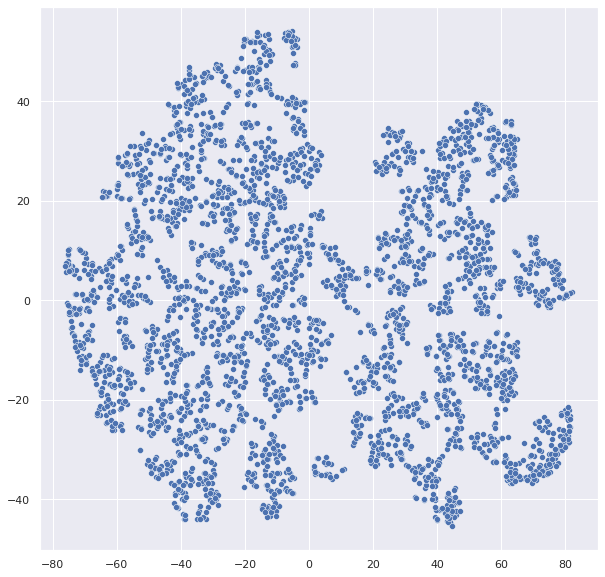

In [66]:
tsne = TSNE()
low_vectors = tsne.fit_transform(train_features)
fig = plot_vecs_n_labels(low_vectors)

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_features)
model = GaussianMixture(n_components=2,
                        covariance_type="full",
                        n_init=20,
                        random_state = seed_num)
    
cluster = model.fit_predict(X_scaled)

In [68]:
print(np.sum(cluster==0))
print(np.sum(cluster==1))

1925
1343


In [69]:
shuffle_train["cluster"] = cluster

In [70]:
shuffle_train

,IMG_ID,Category,Extension,Width,Height,Channel,Path,cluster
24936,ybjxburheqngcghkrchk.jpg,L2_50,jpg,375,500,3,data/L2_50/ybjxburheqngcghkrchk.jpg,0
2027,xgvpwsbnwhstuaoeqqzx.jpg,L2_12,jpg,375,500,3,data/L2_12/xgvpwsbnwhstuaoeqqzx.jpg,0
2304,vwcsxxbpnnbjmlylkfzz.jpg,L2_12,jpg,333,500,3,data/L2_12/vwcsxxbpnnbjmlylkfzz.jpg,0
2096,hrcqfimfujdqyzzbvhjg.jpg,L2_12,jpg,333,500,3,data/L2_12/hrcqfimfujdqyzzbvhjg.jpg,0
24790,swxrltqucsyjftlkfyic.jpg,L2_50,jpg,375,500,3,data/L2_50/swxrltqucsyjftlkfyic.jpg,0
...,...,...,...,...,...,...,...,...
5318,zgpgvpobvjjezkipzjnr.jpg,L2_24,jpg,375,500,3,data/L2_24/zgpgvpobvjjezkipzjnr.jpg,0
5353,aemwrbvwjwncaipqzdrz.jpg,L2_24,jpg,375,500,3,data/L2_24/aemwrbvwjwncaipqzdrz.jpg,0
5517,ittnpolmizmcjxdkgapn.jpg,L2_24,jpg,375,500,3,data/L2_24/ittnpolmizmcjxdkgapn.jpg,0
5083,lznvspzbinwygmbcrvgg.jpg,L2_24,jpg,3508,2480,3,data/L2_24/lznvspzbinwygmbcrvgg.jpg,1


In [71]:
# shuffle_train.to_csv('simclr_resnet_itr100_gmm.csv', index = False)
# shuffle_train = pd.read_csv('simclr_resnet_itr100_gmm.csv')
print(np.sum(shuffle_train["cluster"]==0))
print(np.sum(shuffle_train["cluster"]==1))

1925
1343


In [72]:
zero_cluster = shuffle_train[shuffle_train.cluster == 0]['Path']
one_cluster = shuffle_train[shuffle_train.cluster == 1]['Path']

시각화

In [ ]:
#try:
#    fig = plt.figure(figsize=(10, 200))
#    for x in range(200):
#        for y in range(10):
#            images = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/'+zero_cluster.values[10*x+y])
#            ax = fig.add_subplot(200, 10, 10*x+y+1)
#            plt.imshow(images)
#            plt.xticks(np.array([]))
#            plt.yticks(np.array([]))
#    plt.show()
#except:
#    pass
#try:
#    fig = plt.figure(figsize=(10, 140))
#    for x in range(140):
#        for y in range(10):
#            images = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/'+one_cluster.values[10*x+y])
#            ax = fig.add_subplot(140, 10, 10*x+y+1)
#            plt.imshow(images)
#            plt.xticks(np.array([]))
#            plt.yticks(np.array([]))
#    plt.show()
#except :
#    pass

### MISSION#3 : Classification

**이미지 크롭**

In [ ]:
#import warnings 
#warnings.filterwarnings('ignore')
#import PIL
#import tensorflow as tf
#import tensorflow.keras
#from tensorflow.keras import layers
#import numpy as np
#import matplotlib.pyplot as plt
#import os
#from PIL import Image, ImageOps
#from PIL import ImageChops
#import random

In [ ]:
#import pandas as pd
#ill=pd.read_csv('/content/drive/MyDrive/img_info2.csv')
#gmm=pd.read_csv('/content/drive/MyDrive/simclr_resnet_itr100_gmm.csv')
#gmm=gmm.iloc[:,1:]


In [ ]:
#gmm=gmm[['IMG_ID','cluster']]
#data=pd.merge(ill,gmm,on='IMG_ID',how='left')
#data=data.fillna(1)
#ill=data[data['cluster']==1]

In [ ]:
#data_labels=os.listdir('/content/drive/MyDrive/data')
#for i in data_labels:
#    os.mkdir('/content/drive/MyDrive/Balanced/'+i)

In [ ]:
#def crop(img): #데이터 정사각형으로!
#  b=Image.new(img.mode,img.size,img.getpixel((0,0)))
#  dif=ImageChops.difference(img,b)
#  dif = ImageChops.add(dif, dif, 2.0, -100)
#  line = dif.getbbox() #0이 아닌부분 바운딩박스
#  croped_img=img.crop(line)
#  x = croped_img.size[0] #넓이값
#  y = croped_img.size[1] #높이값
#  if x != y: 
#    size = max(x,y)    
#    squ_img = Image.new(mode = 'RGB', size = (size, size), color =croped_img.getpixel((0,0)))
#    offset = (round((abs(x - size)) / 2), round((abs(y - size)) / 2))
#    squ_img.paste(croped_img,offset)
#    return squ_img
#  else:
#    return croped_img

In [ ]:
#for i in data_labels:
#    temp=ill[ill['Category']==i]
#    if i in ['L2_33','L2_25','L2_46','L2_10','L2_15']:
#        N=random.sample(range(len(temp)),600)
#        for j in N:
#            img=PIL.Image.open(temp.iloc[j]['Path']).convert('RGB')
#            img=crop(img)
#            img=img.resize((224,224), Image.ANTIALIAS)
#            img.save('/content/drive/MyDrive/Balanced/'+i+'/'+temp.iloc[j]['Path'].split('/')[-1])
#    else:
#        for j in range(len(temp)):
#            img=PIL.Image.open(temp.iloc[j]['Path']).convert('RGB')
#            img=crop(img)
#            img=img.resize((224,224), Image.ANTIALIAS)
#            img.save('/content/drive/MyDrive/Balanced/'+i+'/'+temp.iloc[j]['Path'].split('/')[-1])
#    print(i)

In [ ]:
#X=[]
#Y=[]
#for i in data_labels:
#    temp=ill[ill['Category']==i]
#    if i in ['L2_33','L2_25']:
#        N=random.sample(range(len(temp)),600)
#        for j in N:
#            img=PIL.Image.open(temp.iloc[j]['Path']).convert('RGB')
#            #img=crop(img)
#            img=img.resize((224,224), Image.ANTIALIAS)
#            img=np.asarray(img)
#            X.append(img)
#            Y.append(class_names[temp.iloc[j]['Category']])
#    else:
#        for j in range(len(temp)):
#            img=PIL.Image.open(temp.iloc[j]['Path']).convert('RGB')
#            #img=crop(img)
#            img=img.resize((224,224), Image.ANTIALIAS)
#            img=np.asarray(img)
#            X.append(img)
#            Y.append(class_names[temp.iloc[j]['Category']])
#    print(i)

In [ ]:
#X=np.array(X)
#Y=np.array(Y)

In [ ]:
#np.save('/content/drive/MyDrive/npy_data/224_imbalanced_x_final.npy',X)
#np.save('/content/drive/MyDrive/npy_data/224_imbalanced_y_final.npy',Y)

모델 VGG+Residual


## Load Dataset

In [75]:
import tensorflow as tf
import tensorflow.keras
from keras import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from keras.datasets import cifar10
from keras.utils import to_categorical,load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score,confusion_matrix,classification_report
#Convolution Neural Networks Filter Image
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, UpSampling2D
# Convolution Auto Encoder Filter Image
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Concatenate ,Conv2DTranspose,GlobalAveragePooling2D,add,ZeroPadding2D,concatenate
from keras import optimizers
from keras.models import Model
from keras import backend as K
from keras import regularizers
from keras.layers import Input,Layer
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D ,LeakyReLU,ReLU, Concatenate,Flatten,BatchNormalization,Dropout,ReLU,LeakyReLU,PReLU
from keras import optimizers
from keras.models import Model
import gc
from sklearn.metrics import f1_score,confusion_matrix,classification_report
import collections

In [76]:
data=np.load('/content/drive/MyDrive/npy_data/224_imbalanced_x_final.npy')
labels=np.load("/content/drive/MyDrive/npy_data/224_imbalanced_y_final.npy")

In [77]:
 def normalize_image(img):
     img=img .astype('float32')
     for i in range(len(img)):
         img[i]= img[i]/ 255.0
         img[i][:,:,0]-=0.485 #R
         img[i][:,:,1]-=0.458 #G
         img[i][:,:,2]-=0.408 #B
        
         img[i][:,:,0]/=0.229 #R
         img[i][:,:,1]/=0.224 #G
         img[i][:,:,2]/=0.225 #B
     return img

In [78]:
data= normalize_image(data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [ ]:
y_train = to_categorical(y_train,20) #원핫 인코딩
y_test=to_categorical(y_test,20) #원핫 인코딩

In [ ]:
epochs = 10 #학습 반복 수
inChannel = 3 # 3채널 고정
x, y = 224, 224 # 바꿔서 사용
act=ReLU()
n_class = 20 #클래스 수
lr=0.0001 #learning rate- adam default
loss = 'categorical_crossentropy' #손실함수 
batch_size=32 #배치사이즈
opt=optimizers.Adam(learning_rate=lr)

In [ ]:
# 모델 여기다 붙여넣기
def model_fn():
    input_img = Input(shape=(x,y,inChannel))
    vgg = Conv2D(64, (3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(input_img)
    vgg = Conv2D(64,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg = Conv2D(128,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(128,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg1 = Conv2D(256,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(256,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg1)
    vgg = Conv2D(256,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = add([vgg1,vgg])
    vgg = ReLU()(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg2 = Conv2D(256,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(256,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg2)
    vgg = Conv2D(256,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = add([vgg2,vgg])
    vgg = ReLU()(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg3 = Conv2D(512,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg3)
    vgg = Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = add([vgg3,vgg])
    vgg = ReLU()(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg3 = Conv2D(512,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg3)
    vgg = Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = add([vgg3,vgg])
    vgg = ReLU()(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg = Flatten()(vgg)
    vgg = Dense(4096,activation='relu')(vgg)
    vgg = Dropout(0.2)(vgg)
    vgg = Dense(4096,activation='relu')(vgg)
    vgg = Dropout(0.2)(vgg)
    vgg = Dense(n_class,activation='softmax')(vgg)

    vgg16 = Model(input_img , vgg)
    return vgg16

## Summary

In [ ]:
model= model_fn()
model.summary()

## F1-Score / Epoch 

In [ ]:
#https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
def F1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Model Train

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,LearningRateScheduler,Callback

#경로 바꿔주기
filename = '/content/drive/MyDrive/modelcheckpoint/model.ckpt'
checkpoint = ModelCheckpoint(filename,             
                             monitor='val_F1_score',
                             save_weights_only=True,
                             verbose=1,           
                             save_best_only=True,  
                             mode='max'         
                            )

earlystopping = EarlyStopping(monitor='val_F1_score',  
                              patience=6,         
                             mode='max'
                             )
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), mode='max',cooldown=0,
                              patience=10, min_lr=0.000000001)

In [ ]:
trainGenerator = ImageDataGenerator( horizontal_flip=True, vertical_flip=True,
                    rotation_range = 10, shear_range=0.2)
trainiterator = trainGenerator.flow(x_train, y_train, batch_size=batch_size)

testGenerator = ImageDataGenerator()
testiterator = testGenerator.flow(x_test, y_test, batch_size=batch_size)

vgg16=model_fn()
vgg16.compile(loss=loss, optimizer=opt, metrics=['accuracy',F1_score],run_eagerly=True)

In [ ]:
vgg_train = vgg16.fit(trainiterator,
                      epochs=epochs,
                      validation_data= testiterator, verbose=1,callbacks=[checkpoint,earlystopping,reduce_lr]
                                   )

In [ ]:
vgg16.load_weights('/content/drive/MyDrive/modelcheckpoint/model.ckpt')
pred= vgg16.predict(x_test)

118/118 [==============================] - 2165s 18s/step


In [ ]:
#pred의 경우 50개의 값 중 가장 높은 predict값을 가지는 인덱스를 라벨(클래스)로 사용
y_pred=[]
y_true=[]
for i in range(len(pred)):
    tmp1 = pred[i].argmax() #최대값을 가지는 인덱스
    tmp2 = y_test[i].argmax() #최대값을 가지는 인덱스 -> 0과 1만 가지므로 1인 인덱스 반환
    y_pred.append(tmp1)
    y_true.append(tmp2)

In [ ]:
from sklearn.metrics import f1_score
print("각 클래스별 F1-Score의 평균: {0} ".format(f1_score(y_true, y_pred, average = None).mean()))

In [ ]:
print(metrics.confusion_matrix(y_true, y_pred))
print(metrics.classification_report(y_true, y_pred, digits=3))